In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats
%matplotlib inline

In [2]:
allocs = pd.Series([.3, .3, .35, .05, 1], index=['ES','NQ', 'GC', 'CL', 'total'])
#allocs = pd.Series([2/3, 1/3, 1], index=['ES','NQ', 'total'])
cash = 100000

In [3]:
df = pd.read_csv('/home/tomek/ib_tools/backtests/backtest_2020-05-13_12-08_20190101_20191231.csv')
del df['sys_time']
del df['exec_ids']
try:
    del df['perm_id']
    del df['com_reports']
except:
    pass
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['cash'] = df.realizedPNL.cumsum() + cash
df['contract'] = df['contract'].apply(lambda x: x[:-2])

In [4]:
df.groupby('contract').realizedPNL.sum()

contract
CL    -3139.12
ES    10862.50
GC   -11797.64
NQ     6252.80
Name: realizedPNL, dtype: float64

In [5]:
df.realizedPNL.sum()

2178.5400000000036

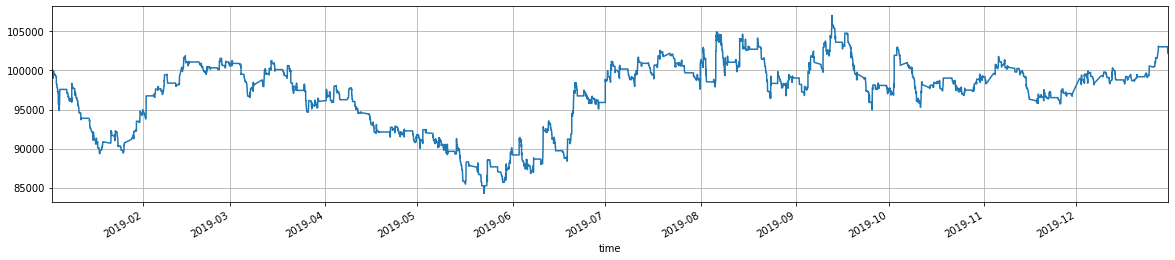

In [6]:
df.cash.plot(figsize=(20,4), grid=True);

In [7]:
by_contract = pd.pivot_table(df, values='realizedPNL', index=df.index, columns=['contract'])
by_contract['total'] = by_contract.sum(axis=1)

In [8]:
df

,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,
2019-01-02 06:19:00,GC,BUY,1,1287.10,1,ENTRY,2.42,0.00,100000.00
2019-01-02 07:01:00,CL,SELL,1,44.71,3,ENTRY,2.37,0.00,100000.00
2019-01-02 08:13:00,GC,SELL,1,1287.50,2,STOP-LOSS,2.42,35.16,100035.16
2019-01-02 09:22:00,NQ,SELL,1,6192.25,5,ENTRY,2.10,0.00,100035.16
2019-01-02 09:43:00,GC,BUY,1,1289.70,7,ENTRY,2.42,0.00,100035.16
...,...,...,...,...,...,...,...,...,...
2019-12-30 16:16:00,NQ,SELL,1,8695.50,4610,ENTRY,2.10,0.00,102777.42
2019-12-30 16:20:00,GC,SELL,1,1517.40,4609,STOP-LOSS,2.42,-134.84,102642.58
2019-12-30 16:20:00,NQ,BUY,1,8710.25,4611,STOP-LOSS,2.10,-299.20,102343.38


In [9]:
df[(df['contract'] == 'GC')]

,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,
2019-01-02 06:19:00,GC,BUY,1,1287.1,1,ENTRY,2.42,0.00,100000.00
2019-01-02 08:13:00,GC,SELL,1,1287.5,2,STOP-LOSS,2.42,35.16,100035.16
2019-01-02 09:43:00,GC,BUY,1,1289.7,7,ENTRY,2.42,0.00,100035.16
2019-01-02 10:56:00,GC,SELL,1,1289.1,8,STOP-LOSS,2.42,-64.84,100031.12
2019-01-02 19:54:00,GC,SELL,1,1280.8,15,ENTRY,2.42,0.00,99926.90
...,...,...,...,...,...,...,...,...,...
2019-12-27 17:36:00,GC,SELL,1,1518.3,4601,STOP-LOSS,2.42,-74.84,103020.56
2019-12-30 16:11:00,GC,BUY,1,1518.7,4608,ENTRY,2.42,0.00,102777.42
2019-12-30 16:20:00,GC,SELL,1,1517.4,4609,STOP-LOSS,2.42,-134.84,102642.58


In [10]:
# number of trades
trades = df.groupby('contract').action.count()
trades

contract
CL     776
ES     250
GC    2342
NQ    1232
Name: action, dtype: int64

In [11]:
# commission paid
df.groupby('contract').commission.sum()

contract
CL    1839.12
ES     525.00
GC    5667.64
NQ    2587.20
Name: commission, dtype: float64

In [12]:
df.commission.sum()

10618.96

In [13]:
# per trade stats
exits = df[df.realizedPNL!=0]
dfs = {}
for contract in exits.contract.unique():
    dfs[contract] = exits[exits.contract == contract]
dfs['total'] = exits
results = pd.DataFrame(columns=['success_rate', 'average_PNL', 'average_gain', 'average_loss','win_ratio', 'EV',
                               'number_of_positions'])
for c, d in dfs.items():
    row = pd.Series()
    row['success_rate'] = round((d[d.realizedPNL > 0]).realizedPNL.count() / d.realizedPNL.count(), 2)
    row['average_PNL'] = round(d.realizedPNL.mean(), 2)
    row['average_gain'] = round((d[d.realizedPNL > 0]).realizedPNL.mean(), 2)
    row['average_loss'] = round((d[d.realizedPNL < 0]).realizedPNL.mean(), 2)
    row['win_ratio'] = round(abs(row['average_gain'] / row['average_loss']), 2)
    row['EV'] = round((row['average_gain'] * row['success_rate']) + (
        row['average_loss'] * (1 - row['success_rate'])), 2)
    row['number_of_positions'] = d.realizedPNL.count()
    results.loc[c] = row
results

,success_rate,average_PNL,average_gain,average_loss,win_ratio,EV,number_of_positions
GC,0.36,-10.07,198.62,-128.97,1.54,-11.04,1171.0
NQ,0.38,10.15,433.78,-251.14,1.73,9.13,616.0
CL,0.35,-8.09,581.95,-326.53,1.78,-8.56,388.0
ES,0.45,86.90,802.27,-493.69,1.63,89.49,125.0
total,0.37,0.95,364.35,-212.88,1.71,0.70,2300.0


In [14]:
daily = by_contract.resample('B').sum()
daily = daily.cumsum() +  (allocs * cash)
#daily[['CL', 'ES', 'GC', 'NQ']].plot(figsize=(20,8), grid=True);

In [15]:
# instrument correlations
log_returns = np.log(daily.pct_change()[1:] + 1)
log_returns.corr()

,CL,ES,GC,NQ,total
CL,1.000000,0.057071,0.054205,0.034694,0.333498
ES,0.057071,1.000000,-0.000003,0.168069,0.552781
GC,0.054205,-0.000003,1.000000,0.164742,0.423069
NQ,0.034694,0.168069,0.164742,1.000000,0.636775
total,0.333498,0.552781,0.423069,0.636775,1.000000


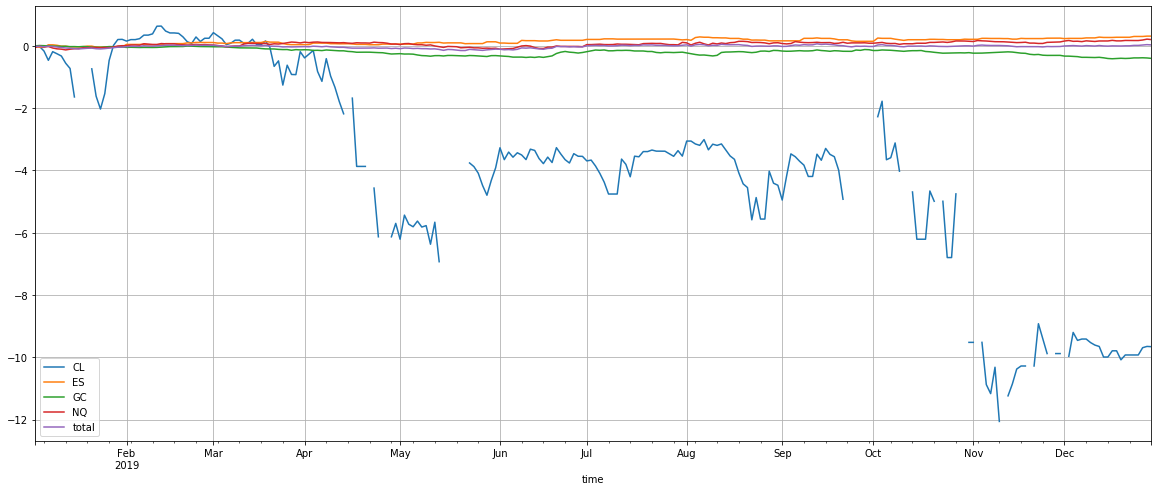

In [16]:
log_returns.cumsum().plot(figsize=(20,8), grid=True);

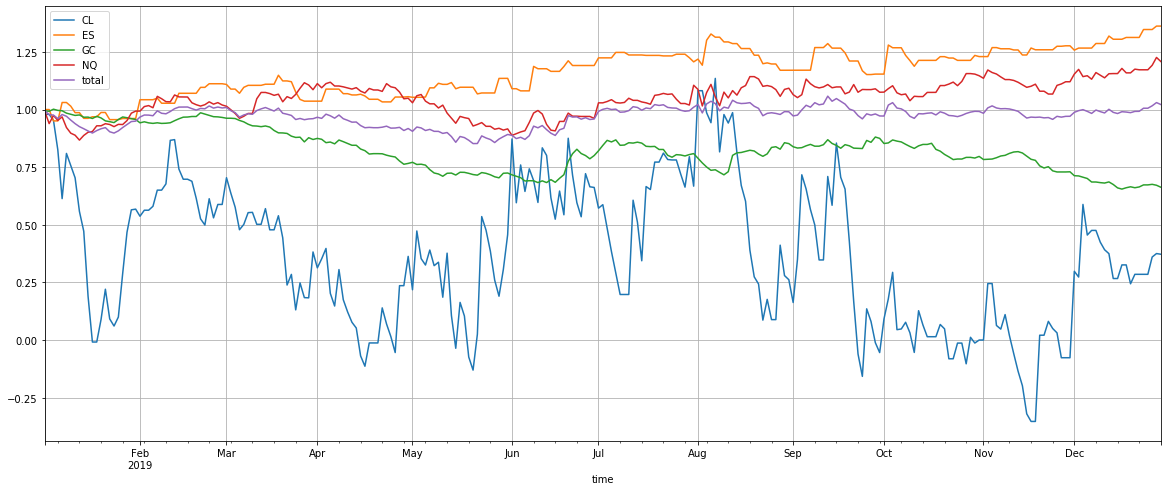

In [17]:
returns = daily.pct_change()
returns.iloc[0] = (daily.iloc[0] / (allocs * cash))-1
returns_index = (returns + 1).cumprod()
returns_index.plot(figsize=(20,8), grid=True);

In [18]:
stats = pd.DataFrame()
for col in returns.columns:
    stats[col] = perf_stats(returns[col])
stats

,CL,ES,GC,NQ,total
Annual return,-0.617748,0.350755,-0.329669,0.202259,0.021190
Cumulative returns,-0.627824,0.362083,-0.337075,0.208427,0.021785
Annual volatility,2159.214743,0.301218,0.238048,0.328676,0.216733
Sharpe ratio,-1.000841,1.144072,-1.562410,0.722992,0.203903
Calmar ratio,-0.471121,2.646323,-0.952398,0.980205,0.131861
Stability,NaN,0.793322,0.422467,0.435760,0.134257
Max drawdown,-1.311231,-0.132544,-0.346146,-0.206344,-0.160703
Omega ratio,0.033973,1.372707,0.753175,1.136818,1.034579
Sortino ratio,-1.000840,2.366290,-2.450858,1.162114,0.326572
Skew,-15.995026,2.570147,1.995616,0.598355,0.840695


In [19]:
# monthly returns in percent
monthly_log_returns = log_returns.resample('M').sum()
monthly_returns = np.exp(monthly_log_returns)-1
round(monthly_returns, 4) * 100

,CL,ES,GC,NQ,total
time,,,,,
2019-01-31,22.77,-3.89,-3.75,0.16,-4.50
2019-02-28,3.57,15.69,0.92,2.67,6.04
2019-03-31,-35.05,-6.80,-9.91,6.51,-4.62
2019-04-30,-99.60,1.88,-11.94,-3.41,-4.44
2019-05-31,493.77,7.54,-5.43,-12.68,-2.82
2019-06-30,44.77,4.90,10.46,4.97,7.52
2019-07-31,0.84,1.33,1.06,14.97,5.34
2019-08-31,-60.79,-2.99,5.36,-1.17,-1.97
2019-09-30,363.35,-1.45,2.67,-1.59,-1.83


In [20]:
# total returns by contract in percent
round(np.exp(monthly_log_returns.sum())-1, 2)* 100

CL      -100.0
ES        36.0
GC       -33.0
NQ        22.0
total      3.0
dtype: float64

In [21]:
df.sort_values('realizedPNL', ascending=False)[['contract', 'action', 'price', 'realizedPNL']]

,contract,action,price,realizedPNL
time,,,,
2019-10-02 20:46:00,ES,BUY,2892.50,3783.30
2019-08-05 21:23:00,ES,BUY,2844.25,3258.30
2019-06-10 20:13:00,ES,SELL,2887.75,3183.30
2019-09-09 18:32:00,ES,SELL,2973.25,2945.80
2019-05-23 16:33:00,CL,BUY,58.36,2665.26
...,...,...,...,...
2019-09-17 19:58:00,CL,BUY,59.50,-874.74
2019-01-23 16:50:00,ES,SELL,2633.50,-929.20
2019-03-26 00:54:00,ES,BUY,2810.25,-954.20
